### Part A - Q1 A - Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# read the data

data = pd.read_csv('NN Project Data - Signal.csv')
data.shape

(1599, 12)

### Part A - Q1 B - Check for missing values and print percentage for each attribute.

In [3]:
# check missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# percentage missing values

100*data.isna().sum()/len(data)

Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64

- There are no missing values in the data.

### Part A - Q1 C - Check for presence of duplicate records in the dataset and impute with appropriate method.

In [5]:
# check for duplicate rows

data.loc[data.duplicated(), :]

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [6]:
# drop the duplicate rows

data = data.drop_duplicates().reset_index(drop=True)
data.shape

(1359, 12)

### Part A - Q1 D - Visualise distribution of the target variable.

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

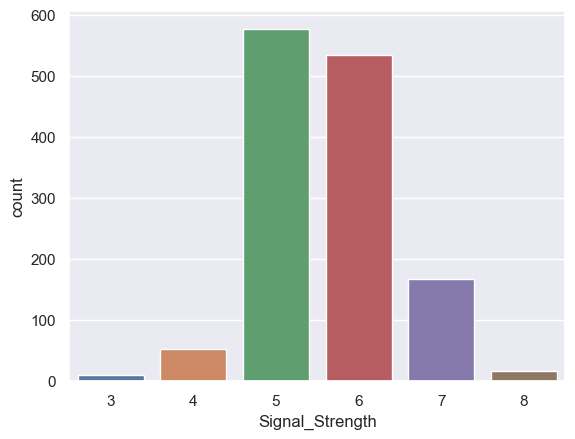

In [7]:
sns.countplot(x=data['Signal_Strength'], data=data)

### Part A - Q1 E - Share insights from the initial data analysis (at least 2).

- There are 6 different classes observed in the target variable.
- Imbalanced class distribution is observed with majority class as '5' & '6'.

### Part A - Q2 A - Split the data into X & Y.

In [8]:
x = data.iloc[:, 0:11]
y = data.iloc[:, 11]

### Part A - Q2 B - Split the data into train & test with 70:30 proportion.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=42)

### Part A - Q2 C - Print shape of all the 4 variables and verify if train and test data is in sync.

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(951, 11)
(951,)
(408, 11)
(408,)


### Part A - Q2 D - Normalise the train and test data with appropriate method.

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Part A - Q2 E - Transform Labels into format acceptable by Neural Network.

In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [13]:
np.unique(y_train_encoded)

array([0, 1, 2, 3, 4, 5], dtype=int64)

### Part A - Q3 A - Design a Neural Network to train a classifier.

In [14]:
import tensorflow as tf

tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=13, input_shape=(11,), activation='relu')) # input layer & 1st hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='softmax')) # output layer


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                156       
                                                                 
 dense_1 (Dense)             (None, 6)                 84        
                                                                 
Total params: 240
Trainable params: 240
Non-trainable params: 0
_________________________________________________________________


### Part A - Q3 B - Train the classifier using previously designed Architecture.

In [16]:
# compile the model

model.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [17]:
# training the 1st model

history = model.fit(x_train_scaled, y_train_encoded, validation_split=0.3, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 15ms/step - loss: 1.7043 - accuracy: 0.3850 - val_loss: 1.6731 - val_accuracy: 0.3986
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.6547 - accuracy: 0.3489 - val_loss: 1.6252 - val_accuracy: 0.3531
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 1.6074 - accuracy: 0.3519 - val_loss: 1.5802 - val_accuracy: 0.3636
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 1.5630 - accuracy: 0.3564 - val_loss: 1.5374 - val_accuracy: 0.3951
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 1.5210 - accuracy: 0.3865 - val_loss: 1.4979 - val_accuracy: 0.4196
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 1.4825 - accuracy: 0.3880 - val_loss: 1.4621 - val_accuracy: 0.4266
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 1.4480 - accuracy: 0.4045 - val_loss: 1.4312 - val_accuracy: 0.4266
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2062 - accuracy: 0.5128 - val_loss: 1.2229 - val_accuracy: 0.4860
Epoch 60/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2056 - accuracy: 0.5083 - val_loss: 1.2225 - val_accuracy: 0.4860
Epoch 61/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2050 - accuracy: 0.5053 - val_loss: 1.2222 - val_accuracy: 0.4895
Epoch 62/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2048 - accuracy: 0.5098 - val_loss: 1.2220 - val_accuracy: 0.4755
Epoch 63/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2042 - accuracy: 0.5023 - val_loss: 1.2216 - val_accuracy: 0.4860
Epoch 64/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2038 - accuracy: 0.5128 - val_loss: 1.2213 - val_accuracy: 0.4825
Epoch 65/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2034 - accuracy: 0.5038 - val_loss: 1.2208 - val_accuracy: 0.4930
Epoch 

In [18]:
model.evaluate(x_test_scaled, y_test_encoded)

13/13 [==============================] - 0s 1ms/step - loss: 1.1862 - accuracy: 0.5098


[1.1861796379089355, 0.5098039507865906]

### Part A - Q3 C - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy.

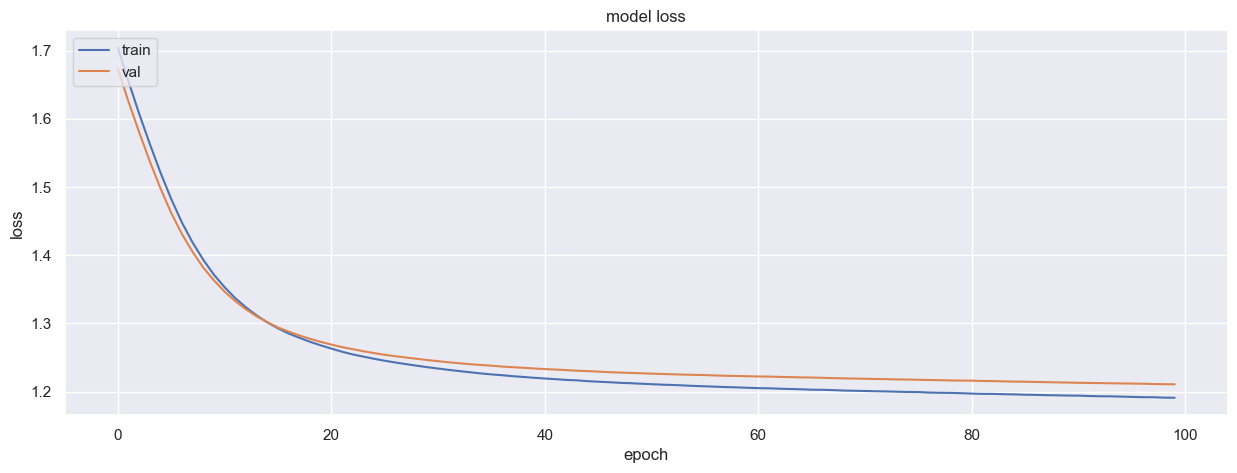

In [19]:
# training loss and validation loss curves for the 1st model

plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

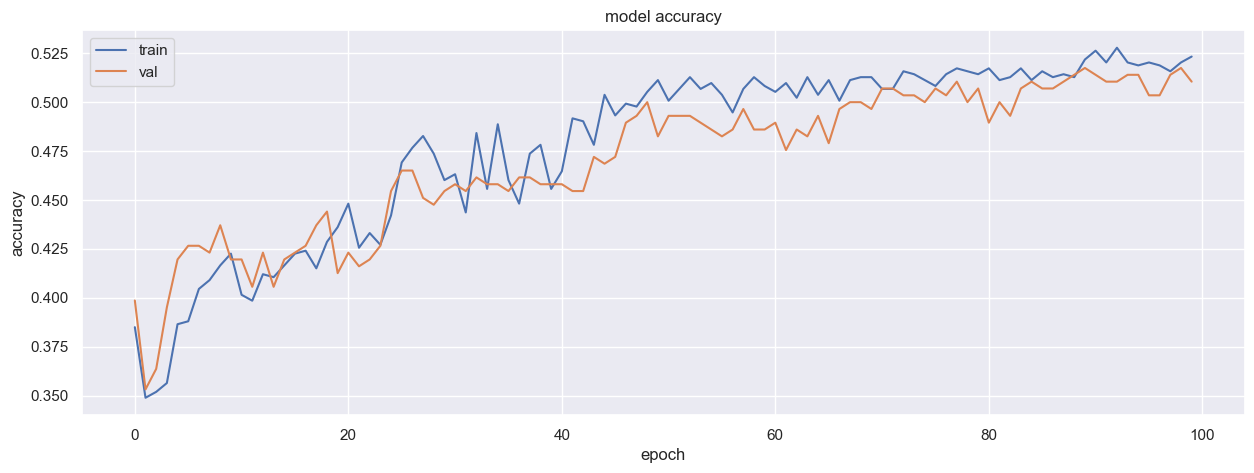

In [20]:
# training accuracy and validation accuracy curves for the 1st model

plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Part A - Q3 D - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [21]:
# increase the number of hidden layers and the number of neurons

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units=22, input_shape=(11,), activation='relu')) # input layer & 1st hidden layer
model1.add(tf.keras.layers.Dense(units=22, activation='relu')) # 2nd hidden layer
model1.add(tf.keras.layers.Dense(units=22, activation='relu')) # 3rd hidden layer
model1.add(tf.keras.layers.Dense(units=6, activation='softmax')) # output layer

In [22]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 22)                264       
                                                                 
 dense_3 (Dense)             (None, 22)                506       
                                                                 
 dense_4 (Dense)             (None, 22)                506       
                                                                 
 dense_5 (Dense)             (None, 6)                 138       
                                                                 
Total params: 1,414
Trainable params: 1,414
Non-trainable params: 0
_________________________________________________________________


In [23]:
# compile the model with Adam optimizer

model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# training the 2nd model

history = model1.fit(x_train_scaled, y_train_encoded, validation_split=0.3, batch_size=50, epochs=100, verbose=1)

Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 1.7613 - accuracy: 0.0331 - val_loss: 1.7123 - val_accuracy: 0.3706
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.6757 - accuracy: 0.4075 - val_loss: 1.6339 - val_accuracy: 0.4196
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 1.5890 - accuracy: 0.4421 - val_loss: 1.5426 - val_accuracy: 0.4790
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 1.4882 - accuracy: 0.5068 - val_loss: 1.4309 - val_accuracy: 0.5035
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 1.3689 - accuracy: 0.5233 - val_loss: 1.3280 - val_accuracy: 0.4965
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2849 - accuracy: 0.4602 - val_loss: 1.2734 - val_accuracy: 0.4441
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 1.2399 - accuracy: 0.4872 - val_loss: 1.2481 - val_accuracy: 0.5175
Epoch 8/100


Epoch 59/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9561 - accuracy: 0.5940 - val_loss: 1.0305 - val_accuracy: 0.5699
Epoch 60/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9557 - accuracy: 0.5925 - val_loss: 1.0302 - val_accuracy: 0.5839
Epoch 61/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9552 - accuracy: 0.5940 - val_loss: 1.0299 - val_accuracy: 0.5804
Epoch 62/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9539 - accuracy: 0.5955 - val_loss: 1.0296 - val_accuracy: 0.5769
Epoch 63/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9549 - accuracy: 0.5820 - val_loss: 1.0298 - val_accuracy: 0.5769
Epoch 64/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9543 - accuracy: 0.5910 - val_loss: 1.0278 - val_accuracy: 0.5769
Epoch 65/100
14/14 [==============================] - 0s 3ms/step - loss: 0.9512 - accuracy: 0.5955 - val_loss: 1.0317 - val_accuracy: 0.5769
Epoch 

In [25]:
model1.evaluate(x_test_scaled, y_test_encoded)

13/13 [==============================] - 0s 1ms/step - loss: 0.9336 - accuracy: 0.6152


[0.9336313605308533, 0.6151960492134094]

### Part A - Q3 E - Plot visuals as in Q3.C and share insights about difference observed in both the models.

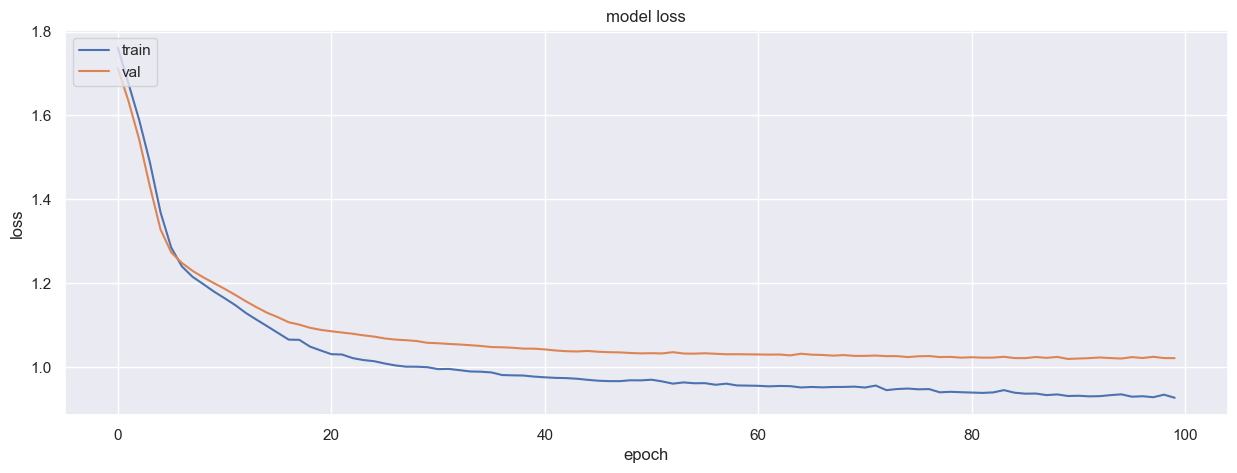

In [26]:
# training loss and validation loss curves for the 2nd model

plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

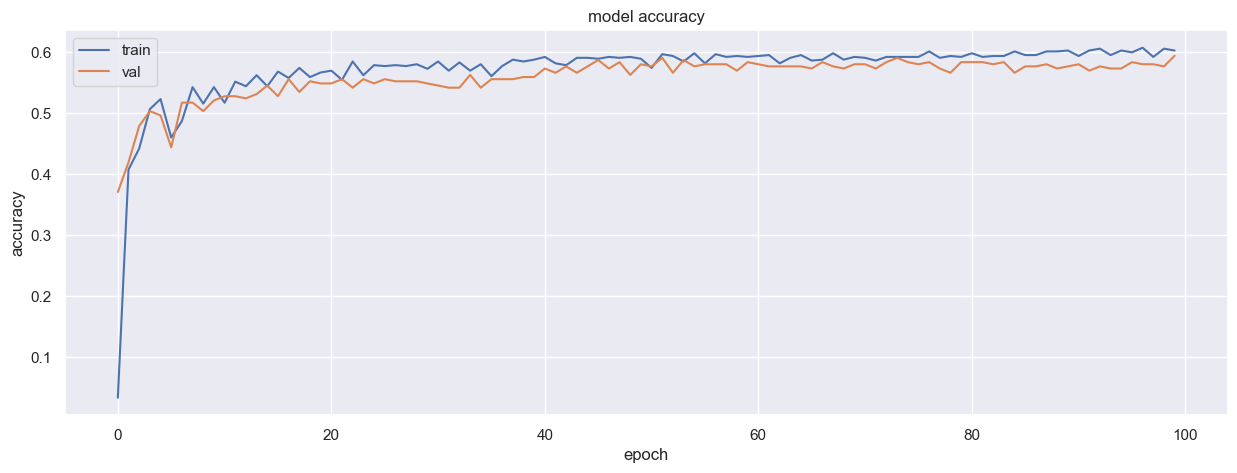

In [27]:
# training accuracy and validation accuracy curves for the 2nd model

plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- 1st model had one hidden layer with 13 neurons and SGD optimizer used in compile function. The accuracy we got is 0.5098.
- In 2nd model we increased the number of neurons and hidden layers. Adam optimizer used in compile function. The accuracy improved to 0.6152.
- The accuracy curves for the 1st model is fluctuating more as compared to the accuracy curves of the 2nd model.
- We can further update the architecture with dropout, l1 & l2 regularization, batch normalization, etc. for improving the accuracy.

### Part B - Q1 A - Read the .h5 file and assign to a variable.

In [28]:
import h5py

data = h5py.File('Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')
print(type(data))

<class 'h5py._hl.files.File'>


### Part B - Q1 B - Print all the keys from the .h5 file.

In [29]:
for key in data.keys():
    print(key)

X_test
X_train
X_val
y_test
y_train
y_val


### Part B - Q1 C - Split the data into X_train, X_test, Y_train, Y_test.

In [30]:
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

### Part B - Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


- X & y is in sync.

### Part B - Q2 B - Visualise first 10 images in train data and print its corresponding labels.

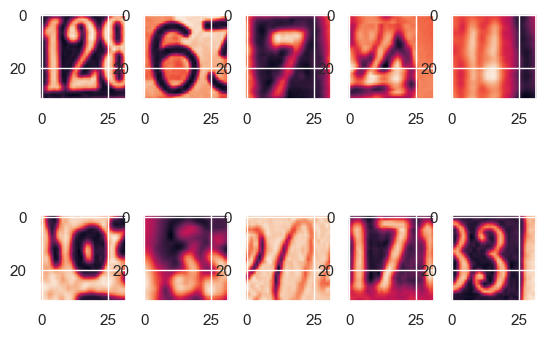

In [32]:
# plotting the first 10 images in the train set
 
fig, axs = plt.subplots(2, 5)
cnt = 0
for i in range(2):
     for j in range(5):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [33]:
print(y_train[0:10])

[2 6 7 4 4 0 3 0 7 3]


### Part B - Q2 C -Reshape all the images with appropriate shape update the data in same variable.

In [34]:
X_train = X_train.reshape(42000, 1024) 
X_test = X_test.reshape(18000, 1024) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

### Part B - Q2 D - Normalise the images i.e. Normalise the pixel values.

In [35]:
X_train /= 255 
X_test /= 255 

### Part B - Q2 E - Transform Labels into format acceptable by Neural Network.

In [36]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

- As the labels are already in the format acceptable by Neural Network, we keep it as it is.

### Part B - Q2 F - Print total Number of classes in the Dataset.

In [37]:
print('Number of classes in the dataset: ', len(np.unique(y_test)))

Number of classes in the dataset:  10


### Part B - Q3 A - Design a Neural Network to train a classifier.

In [38]:
# nn architecture

mdl = tf.keras.models.Sequential()
mdl.add(tf.keras.layers.Dense(units=512, input_shape=(1024,))) # input layer & 1st hidden layer
mdl.add(tf.keras.layers.BatchNormalization())
mdl.add(tf.keras.layers.Dropout(0.35))
mdl.add(tf.keras.layers.Activation('relu'))
mdl.add(tf.keras.layers.Dense(units=256)) # 2nd hidden layer
mdl.add(tf.keras.layers.BatchNormalization())
mdl.add(tf.keras.layers.Dropout(0.3))
mdl.add(tf.keras.layers.Activation('relu'))
mdl.add(tf.keras.layers.Dense(units=10)) # output layer
mdl.add(tf.keras.layers.Activation('softmax'))

In [39]:
# summary

mdl.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                      

### Part B - Q3 B - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [40]:
# compiling the model

mdl.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
# training and testing

history = mdl.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=300, verbose=1)

Epoch 1/300
1313/1313 [==============================] - 15s 10ms/step - loss: 1.6406 - accuracy: 0.4465 - val_loss: 1.5068 - val_accuracy: 0.5133
Epoch 2/300
1313/1313 [==============================] - 13s 10ms/step - loss: 1.1826 - accuracy: 0.6222 - val_loss: 1.1303 - val_accuracy: 0.6558
Epoch 3/300
1313/1313 [==============================] - 13s 10ms/step - loss: 1.0543 - accuracy: 0.6639 - val_loss: 1.3255 - val_accuracy: 0.5670
Epoch 4/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9678 - accuracy: 0.6941 - val_loss: 1.0479 - val_accuracy: 0.6839
Epoch 5/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.9167 - accuracy: 0.7096 - val_loss: 1.0429 - val_accuracy: 0.6627
Epoch 6/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.8769 - accuracy: 0.7231 - val_loss: 1.0323 - val_accuracy: 0.6657
Epoch 7/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.8444 - accuracy: 0.7339 - val_loss: 0

1313/1313 [==============================] - 13s 10ms/step - loss: 0.5206 - accuracy: 0.8320 - val_loss: 0.5401 - val_accuracy: 0.8426
Epoch 57/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5121 - accuracy: 0.8347 - val_loss: 0.6009 - val_accuracy: 0.8349
Epoch 58/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5109 - accuracy: 0.8347 - val_loss: 0.5924 - val_accuracy: 0.8363
Epoch 59/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5038 - accuracy: 0.8371 - val_loss: 0.6485 - val_accuracy: 0.8046
Epoch 60/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5147 - accuracy: 0.8354 - val_loss: 0.5673 - val_accuracy: 0.8445
Epoch 61/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.5074 - accuracy: 0.8334 - val_loss: 0.6081 - val_accuracy: 0.8289
Epoch 62/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.5009 - accuracy: 0.8380 - val_loss: 0.5709 

1313/1313 [==============================] - 14s 10ms/step - loss: 0.4480 - accuracy: 0.8555 - val_loss: 0.5273 - val_accuracy: 0.8459
Epoch 112/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4379 - accuracy: 0.8575 - val_loss: 0.5003 - val_accuracy: 0.8567
Epoch 113/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4392 - accuracy: 0.8570 - val_loss: 0.5741 - val_accuracy: 0.8311
Epoch 114/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4415 - accuracy: 0.8576 - val_loss: 0.5954 - val_accuracy: 0.8167
Epoch 115/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4382 - accuracy: 0.8572 - val_loss: 0.5847 - val_accuracy: 0.8262
Epoch 116/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.4342 - accuracy: 0.8578 - val_loss: 0.5870 - val_accuracy: 0.8211
Epoch 117/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.4354 - accuracy: 0.8595 - val_loss: 0

1313/1313 [==============================] - 14s 10ms/step - loss: 0.4066 - accuracy: 0.8677 - val_loss: 0.5456 - val_accuracy: 0.8391
Epoch 167/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.4021 - accuracy: 0.8693 - val_loss: 0.4928 - val_accuracy: 0.8620
Epoch 168/300
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4061 - accuracy: 0.8683 - val_loss: 0.4746 - val_accuracy: 0.8683
Epoch 169/300
1313/1313 [==============================] - 15s 12ms/step - loss: 0.4006 - accuracy: 0.8679 - val_loss: 0.4993 - val_accuracy: 0.8540
Epoch 170/300
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4005 - accuracy: 0.8679 - val_loss: 0.5030 - val_accuracy: 0.8538
Epoch 171/300
1313/1313 [==============================] - 14s 11ms/step - loss: 0.4059 - accuracy: 0.8675 - val_loss: 0.5659 - val_accuracy: 0.8332
Epoch 172/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.4108 - accuracy: 0.8649 - val_loss: 0

1313/1313 [==============================] - 13s 10ms/step - loss: 0.3850 - accuracy: 0.8738 - val_loss: 0.5103 - val_accuracy: 0.8572
Epoch 222/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3856 - accuracy: 0.8744 - val_loss: 0.4854 - val_accuracy: 0.8603
Epoch 223/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3852 - accuracy: 0.8744 - val_loss: 0.5109 - val_accuracy: 0.8512
Epoch 224/300
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3784 - accuracy: 0.8765 - val_loss: 0.4969 - val_accuracy: 0.8543
Epoch 225/300
1313/1313 [==============================] - 14s 11ms/step - loss: 0.3826 - accuracy: 0.8740 - val_loss: 0.4857 - val_accuracy: 0.8596
Epoch 226/300
1313/1313 [==============================] - 15s 12ms/step - loss: 0.3771 - accuracy: 0.8760 - val_loss: 0.4565 - val_accuracy: 0.8716
Epoch 227/300
1313/1313 [==============================] - 16s 12ms/step - loss: 0.3811 - accuracy: 0.8759 - val_loss: 0

1313/1313 [==============================] - 14s 11ms/step - loss: 0.3631 - accuracy: 0.8818 - val_loss: 0.4934 - val_accuracy: 0.8590
Epoch 277/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3605 - accuracy: 0.8807 - val_loss: 0.4756 - val_accuracy: 0.8690
Epoch 278/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3596 - accuracy: 0.8815 - val_loss: 0.4685 - val_accuracy: 0.8693
Epoch 279/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3681 - accuracy: 0.8794 - val_loss: 0.4579 - val_accuracy: 0.8741
Epoch 280/300
1313/1313 [==============================] - 14s 10ms/step - loss: 0.3546 - accuracy: 0.8827 - val_loss: 0.4899 - val_accuracy: 0.8571
Epoch 281/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3613 - accuracy: 0.8819 - val_loss: 0.4868 - val_accuracy: 0.8652
Epoch 282/300
1313/1313 [==============================] - 13s 10ms/step - loss: 0.3594 - accuracy: 0.8814 - val_loss: 0

### Part B - Q3 C - Evaluate performance of the model with appropriate metrics.

In [42]:
# test loss & test accuracy 

loss, accuracy = mdl.evaluate(X_test,y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

563/563 [==============================] - 2s 4ms/step - loss: 0.4780 - accuracy: 0.8644
loss:  0.47800856828689575
accuracy:  0.8643888831138611


In [43]:
# predictions

y_pred = np.argmax(mdl.predict(X_test), axis=1)

In [44]:
# classification report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1814
           1       0.89      0.86      0.87      1828
           2       0.89      0.88      0.88      1803
           3       0.82      0.83      0.82      1719
           4       0.91      0.91      0.91      1812
           5       0.85      0.86      0.85      1768
           6       0.91      0.82      0.87      1832
           7       0.77      0.94      0.85      1808
           8       0.84      0.86      0.85      1812
           9       0.92      0.79      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.87      0.86      0.86     18000
weighted avg       0.87      0.86      0.86     18000



- Our model's overall performance is good as the metrics scores are better.

### Part B - Q3 D - Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

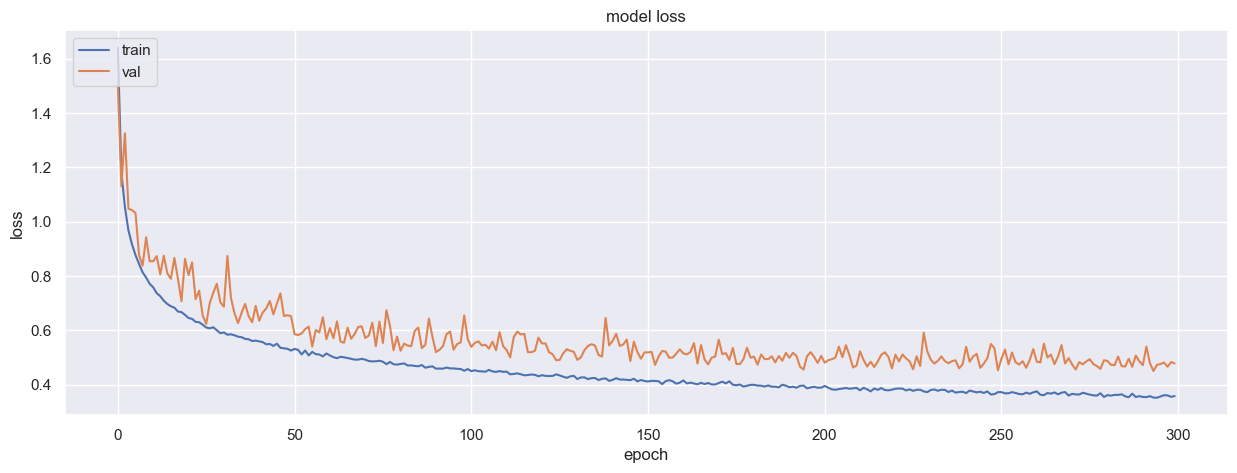

In [45]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Validation loss curve is fluctuating.
- For the initial epochs the loss is reducing very fastly but after that it reduces gradually.
- Training loss curve is more stable as compared to Validation loss curve.

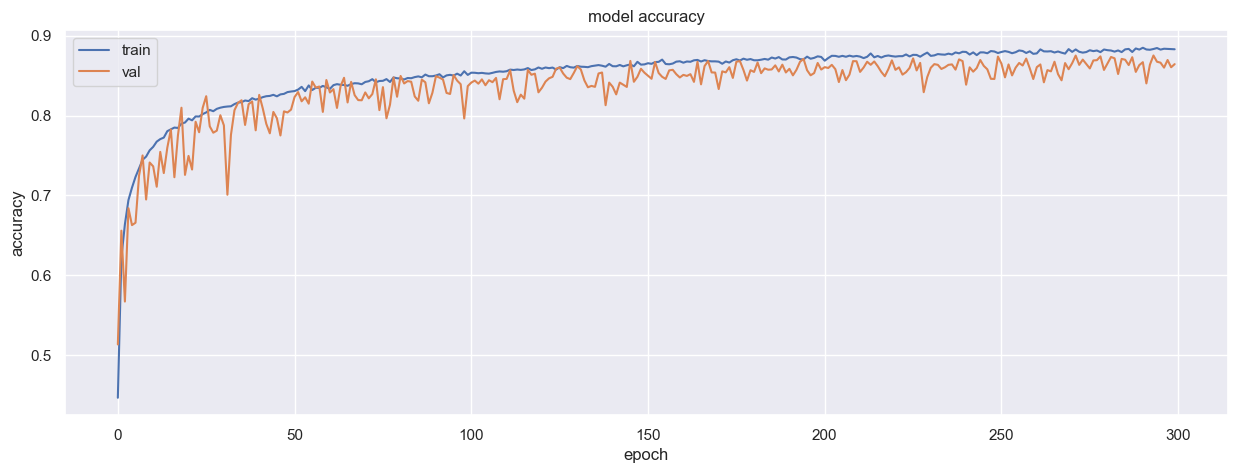

In [46]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- Training accuracy curve is more stable as compared to the Validation accuracy curve.
- Validation accuracy curve is fluctuating.
- For the initial epochs, the accuracy improves at faster rate. After that there is gradual increase in the accuracy.
- As the gap between both the accuracy curve is less, overfitting is ruled out.